# Homework 4: Neural Networks


This assignment is due on Canvas by **11:59pm on May 6**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://canvas.uchicago.edu/courses/42240/assignments/syllabus).


**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda (Version: 2019.07) with Python 3.9. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit this Jupyter notebook and a PDF of your ouput to Canvas.  Do not compress it using tar, rar, zip, etc. 
- In this homework, we will use [PyTorch](https://pytorch.org/) to implement a classifier. Install the current stable release for PyTorch (instructions on homepage of Pytorch website). We recommend you use Anaconda for these installations in a virtual environment but you can use pip as well.

It is **highly recommended** you install the CPU-only version of PyTorch if your'e unfamiliar with the process of installing CUDA libraries for these packages. If you choose to install a GPU version, ensure you're code runs without GPU support.

**Acknowledgment** : Chris Ketelsen

**Please put your name.**

In [10]:
import math
import pickle
import gzip
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Test PyTorch installation
import torch 

torch.manual_seed(1234)

[26 points] Problem 1 - Single-Layer and Multilayer Perceptron Learning
---

### Part 1 [13 points] 
Consider learning the following concepts with either a single-layer or multilayer perceptron where all hidden and output neurons utilize the *indicator* activation functions. For each of the following concepts, state whether the concept can be learned by a single-layer perceptron. Briefly justify your response by providing weights, biases, and the *indicator* activation functions if applicable:

- $\; \texttt{NOT } x_1$

- $\; x_1 \texttt{ NAND } x_2$

- $\; x_1 \texttt{ XNOR } x_2$ (output 1 when $x_1 = x_2$ and 0 otherwise)


**[ANSWER]** First, we will considere as an activation function, the following: $$f(z) = \begin{cases} 1 & z \ge 0 \\ 0 & z < 0 \end{cases}$$ where (for a vector with $n$ inputs $x_i$ and a bias $b$) $$z = \sum_{i=1}^{n} x_i  w_i + b$$

- $\; \texttt{NOT } x_1$

**[ANSWER]** This is the negation of a logical proposition and as a result it gives the opposite boolean value for a given $x_1$. We can depict this situation through the following table:

| $x_1$ | $\texttt{ NOT } x_1$ |
| :-: | :-: |
| $0$ | $1$ |
| $1$ | $0$ |

In this case we want that  $x_1 w_1 + b \ge 0$ for $x_1 = 0$ and the opposite for $x_1 = 1$. If we try with $w_1 = -1$ and $b=1$ we will have the expected result:
$$x_1=0 \longrightarrow z = 0\cdot (-1) + 1 = 1 \longrightarrow z \ge 0 \longrightarrow f(z) = 1$$
$$x_1=1 \longrightarrow z = 1\cdot (-1) + 1 = 0 \longrightarrow z < 0 \longrightarrow f(z) = 0$$

With this information we know that the guessed weights and bias are enough to learn the concept and therefore a single-layer perceptron is enough.



- $\; x_1 \texttt{ NAND } x_2$

**[ANSWER]** This is the logical negation of a boolean conjunction, which can be represented in the following table: 

| $x_1$ | $x_2$ | $x_1 \texttt{ AND } x_2$ | $x_1 \texttt{ NAND } x_2$ |
| :-: | :-: | :-: | :-: |
| $0$ | $0$ | $0$ | $1$ |
| $0$ | $1$ | $0$ | $1$ |
| $1$ | $0$ | $0$ | $1$ |
| $1$ | $1$ | $1$ | $0$ |

As we discussed in class, we know that $\texttt{ NAND }$ operator can be learned with a single-layer perceptron because the outputs are linearly separable with regards to the inputs. We can estimate weights and bias for $\texttt{ NAND }$ as $w=(-1, -1)$ and $b=1$ and proof they work for all possible values of $x_1$ and $x_2$, returning correct predictions. We will use the $z$ and $f(z)$ definitions given at the beggining of this problem. 


$$x_1=0 \wedge x_2=0 \longrightarrow z = 0\cdot (-1) + 0\cdot (-1) + 1 = 1 \longrightarrow z \ge 0 \longrightarrow f(z) = 1$$
$$x_1=0 \wedge x_2=1 \longrightarrow z = 0\cdot (-1) + 1\cdot (-1) + 1 = 0 \longrightarrow z \ge 0 \longrightarrow f(z) = 1$$
$$x_1=1 \wedge x_2=0 \longrightarrow z = 1\cdot (-1) + 0\cdot (-1) + 1 = 0 \longrightarrow z \ge 0 \longrightarrow f(z) = 1$$
$$x_1=1 \wedge x_2=1 \longrightarrow z = 1\cdot (-1) + 1\cdot (-1) + 1 = -1 \longrightarrow z < 0 \longrightarrow f(z) = 0$$


- $\; x_1 \texttt{ XNOR } x_2$ (output 1 when $x_1 = x_2$ and 0 otherwise)

**[ANSWER]** This is the logical negation of an exclusive disyunction, which can be represented in the following table: 

| $x_1$ | $x_2$ | $x_1 \texttt{ XOR } x_2$ | $x_1 \texttt{ XNOR } x_2$ |
| :-: | :-: | :-: | :-: |
| $0$ | $0$ | $0$ | $1$ |
| $0$ | $1$ | $1$ | $0$ |
| $1$ | $0$ | $1$ | $0$ |
| $1$ | $1$ | $0$ | $1$ |

We already discussed in class that the exclusive disyunction ($\texttt{XOR}$) cannot be learned by a single-layer perceptron because the outputs are not linearly separable with regards to the inputs, so we can infer that the $\texttt{ XNOR }$ (logical negation of $\texttt{ XOR}$) also **cannot be learned by a single-layer perceptron**. A way to overcome this situation is by adding more layers to build a multi-layer perceptron able to learn the $\texttt{ XNOR }$. On the other hand, we saw that the $\texttt{ XOR }$ could be written in function of other logical operators as $\texttt{ XOR = AND (OR, NAND) }$ which is equivalent to $(x_1 \vee x_2) \wedge \neg(x_1 \wedge x_2)$. Since $\texttt{ XNOR }$ is the negation of $\texttt{ XOR }$, using De Morgan's laws, we have that
$$\neg((x_1 \vee x_2) \wedge \neg(x_1 \wedge x_2)) \Longleftrightarrow \neg(x_1 \vee x_2) \vee (x_1 \wedge x_2)$$ 
therefore $\texttt{ XNOR }$ could be written as $\texttt{ XNOR = OR (NOR, AND) }$. This representation will be useful to describe an architecture for the multi-layer perceptron in the Part 2 of the problem, where also weights and biases will be specified. 

### Part 2 [13 points] 

Determine an architecture and specific values of the weights and biases in a single-layer or multilayer perceptron with *indicator* activation functions that can learn $x_1 \texttt{ XNOR } x_2$. Make a truth table of $x_1$, $x_2$, and $x_1 \texttt{ XNOR } x_2$, describe your perceptron's architecture, and state your weight matrices and bias vectors in Markdown below. Then demonstrate that your solution is correct by implementing forward propagation for your network in Python and showing that it produces the correct boolean output values for each of the four possible combinations of $x_1$ and $x_2$.

**[ANSWER]** As it was discussed on the Part 1 of the problem, $\texttt{ XNOR }$ can be expressed as $\texttt{ XNOR = OR (NOR, AND)}$, with that in mind the following architecture for a multi-layer perceptron will be proposed, where the first layer computes the $\texttt{ NOR }$ and the $\texttt{ AND}$, and the second layer will compute the $\texttt{ OR}$:

![xnor architecture](figs/xnor.png)

For Part 2 we will use the same $z$ and $f(z)$ defined in Part 1. From there, we also know that the truth table for $x_1 \texttt{ XNOR } x_2$ is:

| $x_1$ | $x_2$ | $x_1 \texttt{ XOR } x_2$ | $x_1 \texttt{ XNOR } x_2$ |
| :-: | :-: | :-: | :-: |
| $0$ | $0$ | $0$ | $1$ |
| $0$ | $1$ | $1$ | $0$ |
| $1$ | $0$ | $1$ | $0$ |
| $1$ | $1$ | $0$ | $1$ |

On the other hand, we will use the following weights and biases to demonstrate that the solution is correct (which will be done by implementing the function ```xnor_fp()```):
$$w_1 = \begin{bmatrix} 1 & 1 \\ -1 & -1\end{bmatrix}, w_2 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}, b_1 = \begin{bmatrix} -0.5 \\ 1.5 \end{bmatrix},  b_2 = -1.5$$

The final output of the implementation will be equivalent to the truth table.

In [11]:
def activation(z):
    """
    Implements the activation function for the multi-layer perceptron

    Input:
        z (float): result of  z = wa+b.
    Output:
        y (int): binary single output, 0 or 1.
    """
    if z < 0:
        return 0
    if z >= 0:
        return 1

def xnor_fp(x):
    """
    Implements XNOR logical operator by using forward-propagation on a
    multi-layer perceptron.

    Input:
        x (array): binary pair of values.
    Output:
        y (int): binary single output, 0 or 1.
    """
    w1 = np.array([[1, 1], [-1, -1]])
    w2 = np.array([1, 1])
    b1 = np.array([-0.5, 1.5])
    b2 = -1.5

    z = np.dot(w1, x) + b1

    new_z = np.zeros(z.shape)

    for i, value in enumerate(z):
        new_z[i] = activation(value)
    
    z = np.dot(w2, new_z) + b2

    return activation(z)

In [12]:
#Test all the possible binary combinations for x = (x1, x2)
test = np.array([[0,0], [0, 1], [1, 0], [1, 1]])

for pair in test:
    print(f"If x1 = {pair[0]} and x2 = {pair[1]}, then x1 XNOR x2 = {xnor_fp(pair)}")

If x1 = 0 and x2 = 0, then x1 XNOR x2 = 0
If x1 = 0 and x2 = 1, then x1 XNOR x2 = 1
If x1 = 1 and x2 = 0, then x1 XNOR x2 = 1
If x1 = 1 and x2 = 1, then x1 XNOR x2 = 0


[30 points] Problem 2 - Back propagation
---

In this problem you will gain some intuition about why training deep neural networks can be very time consuming.  Consider training a chain-like neural network: 


![chain-like nn](figs/chain_net.png)


Note that this network has three weights $W^1, W^2, W^3$ and three biases $b^1, b^2,$ and $b^3$ (for this problem you can think of each parameter as a single value or as a $1 \times 1$ matrix). Suppose that each hidden and output neuron is equipped with a sigmoid activation function and the loss function is given by 

$$
\ell(y, a^4) = \frac{1}{2}(y - a^4)^2  
$$

where $a^4$ is the value of the activation at the output neuron and $y \in \{0,1\}$ is the true label associated with the training example.  

**Note**: Superscripts on $W$'s, $b$'s, and $a$'a are being used as indices and not powers here (e.g. $a^4$ indicates the 4th activation value, not the activation value $a$ to the 4th power.)

### Part 1 [6 points]
Suppose each of the weights is initialized to $W^k = 1.0$ and each bias is initialized to $b^k = -0.5$.  Use forward propagation to find the activities and activations associated with each hidden and output neuron for the training example $(x, y) = (0.5,0)$. Show your work. 

**[ANSWER]** According to the prompt, each hidden and output neuron is equipped with a sigmoid activation function, so we will define the activation function $g(z)$ and $z$ as follows:
$$g(z) = \frac{1}{1 + e^{-z}} \text{    and    } z = x\cdot w + b$$

On the other hand, we will have the following weights and biases: $W=\{1.0, 1.0, 1.0\}$ and $b=\{-0.5, -0.5, -0.5\}$.

Now we will follow the forward propagation algorithm to compute each layer. We start with $a^1 = x = 0.5$, $w^1 = 1.0$ and $b^1 = -0.5$ and we'll use those values to compute $a^2$:
$$a^2 = g(z^2) = g(w^1 \cdot a^1 + b^1) = g(1 \cdot 0.5 -0.5) = g(0)$$
$$a^2 = \frac{1}{1 + e^{0}}$$
$$a^2 = \frac{1}{1 + 1} = \frac{1}{2}$$
$$a^2 = 0.5$$

Now we repeat the process for layer 2:

$$a^2 = 0.5 \text{  and  } w^2 = 1.0 \text{  and  } b^2 = -0.5$$
$$a^3 = g(z^3) = g(w^2 \cdot a^2 + b^2) = g(1 \cdot 0.5 -0.5) = g(0)$$
$$a^3 = \frac{1}{1 + e^{0}}$$
$$a^3 = \frac{1}{1 + 1} = \frac{1}{2}$$
$$a^3 = 0.5$$

And again for layer 4:

$$a^3 = 0.5 \text{  and  } w^3 = 1.0 \text{  and  } b^3 = -0.5$$
$$a^4 = g(z^4) = g(w^3 \cdot a^3 + b^3) = g(1 \cdot 0.5 -0.5) = g(0)$$
$$a^4 = \frac{1}{1 + e^{0}}$$
$$a^4 = \frac{1}{1 + 1} = \frac{1}{2}$$
$$a^4 = 0.5$$

Finally we use the loss function to calculate $\ell$ for $y=0$ and $a^4 = 0.5$:

$$ \ell(y, a^4) = \frac{1}{2}(y - a^4)^2 $$
$$ \ell(0, 0.5) = \frac{1}{2}(0 - 0.5)^2 $$
$$ \ell(0, 0.5) = \frac{0.35}{2} $$
$$ \ell(0, 0.5) = 0.125 $$


### Part 2 [8 points]:
Use Back-Propagation to compute the weight and bias derivatives $\partial \ell / \partial W^k$ and $\partial \ell / \partial b^k$ for $k=1, 2, 3$.  Show all work. 

**[ANSWER]** From the part one, we know that $a^1 = x = 0.5$. We will also use the already defined sigmoid function $g(z)$, and its derivative $g'(z) = g(z)(1-g(z))$, as well as the loss function $\ell$. Additionally we will take into consideration the following expresion for the calculations:

From input layer to hidden layer 1: $z_1 = W^1 \cdot a^1 + b_1$ and $a^2 = g(z_1)$.

From hidden layer 1 to hidden layer 2: $z_2 = W^2 \cdot a^2 + b_2$ and $a^3 = g(z_2)$

From hidden layer 2 to output layer: $z_3 = W^3 \cdot a^3 + b_3$ and $a^4 = g(z_3)$

First we will enunciate the weight derivatives $\partial \ell / \partial W^k$:

$$\frac{\partial \ell}{\partial W^3} = \frac{\partial \ell}{\partial a^4} \frac{\partial a^4}{\partial z_3} \frac{\partial z_3}{\partial W^3}$$
$$\frac{\partial \ell}{\partial W^3} = (a^4 - y) \cdot (g(z_3)(1-g(z_3))) \cdot a^3$$
$$\frac{\partial \ell}{\partial W^3} = (a^4 - y) \cdot (a^4(1-a^4)) \cdot a^3$$
$$\frac{\partial \ell}{\partial W^3} = (0.5 - 0) \cdot (0.5 \cdot (1 - 0.5)) \cdot 0.5$$
$$\frac{\partial \ell}{\partial W^3} = 0.0625$$

Given the set of values for the problem, the above reasoning and the following expressions for $\partial \ell / \partial W^2$ adn $\partial \ell / \partial W^1$:

$$\frac{\partial \ell}{\partial W^2} = \frac{\partial \ell}{\partial a^3} \frac{\partial a^3}{\partial z_2} \frac{\partial z_2}{\partial W^2}$$

$$\frac{\partial \ell}{\partial W^1} = \frac{\partial \ell}{\partial a^2} \frac{\partial a^2}{\partial z_1} \frac{\partial z_1}{\partial W^1}$$

We can conclude that:

$$\frac{\partial \ell}{\partial W^3} =  \frac{\partial \ell}{\partial W^2} = \frac{\partial \ell}{\partial W^1} = 0.0625$$

We can proceed similarly for the biases $\partial \ell / \partial b^k$:

$$\frac{\partial \ell}{\partial b^3} = \frac{\partial \ell}{\partial a^4} \frac{\partial a^4}{\partial z_3} \frac{\partial z_3}{\partial b^3}$$
$$\frac{\partial \ell}{\partial W^3} = (a^4 - y) \cdot (g(z_3)(1-g(z_3))) \cdot 1$$
$$\frac{\partial \ell}{\partial W^3} = (a^4 - y) \cdot (a^4(1-a^4)) \cdot 1$$
$$\frac{\partial \ell}{\partial W^3} = (0.5 - 0) \cdot (0.5 \cdot (1 - 0.5)) \cdot 1$$
$$\frac{\partial \ell}{\partial W^3} = 0.125$$

And again, the result will be the same for all the $\partial \ell / \partial b^k = 0.125$

### Part 3 [6 points]
Implement the following activation functions in NumPy:
* ReLU
* Sigmoid
* softmax
Please **do not use any other external libraries** for this such as sklearn.

**Note**: Assume the input `x` is a 1-dimensional numpy array with $n$ entries (i.e. `x.shape` is `(n,)`). The expected output is an array with the same shape.

In [13]:
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [14]:
# random tests for checking your impementation.
from tests import tests
tests.run_test_suite('prob 2.3', (relu, sigmoid, softmax))

TestRelu (tests.tests.TestActiv) ... ok
TestSigmoid (tests.tests.TestActiv) ... ok
TestSoftmax (tests.tests.TestActiv) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.030s

OK


### Part 4 [6 points] 
Implement the following Loss functions in NumPy:
* mean squared error
* mean absolute error
* hinge

Please **do not use any other external libraries** for this such as sklearn.

**Note**: Assume that the inputs `y` and `yhat` are both 1-dimensional numpy arrays with $n$ entries. The expected output is a float.

In [15]:
def mean_squared_error(yhat, y):
    return (np.square(yhat - y)).mean(axis=0)
    
def mean_absolute_error(yhat, y):
    return np.mean(np.abs(yhat - y))

def hinge(yhat, y):
    return np.mean(np.maximum(np.zeros(y.shape), np.ones(y.shape) - yhat*y))

In [16]:
# random tests for checking your impementation.
from tests import tests
tests.run_test_suite('prob 2.4', (mean_squared_error, mean_absolute_error, hinge))

TestMSE (tests.tests.TestLoss) ... ok
TestMAE (tests.tests.TestLoss) ... ok
TestHinge (tests.tests.TestLoss) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.020s

OK


### Part 5 [6 points]
Explain the vanishing gradient problem. When would you observe this? Give an example.

**[ANSWER]** Generally speaking, the  vanishing gradient problem refers to the fact that the gradients of the loss function approaches to zero in a neural network, difficulting the network's training, as long as more layers are added to the network and these layers use certain activation functions like the sigmoid.

For example, the sigmoid function will have very small derivatives for large inputs (both positives and negatives) and when doing backpropagation this will cause an exponential decrease of the gradient because of the multiplication of several very small derivatives. A small gradient will affect the training process because the initial weights and biases of the network will not be updated properly.

One way to overcome this issue is to use other activation functions that will not produce small derivatives, as the ReLU function.

[30 Points] Problem 3 - Build a feedforward neural network in NumPy
---

In this problem you will implement a class representing a general feed-forward neural network that utilizes the sigmoid activation functions. Your tasks will be to implement forward propagation, prediction, back propagation, and a general train routine to learn the weights in your network via stochastic gradient descent.

The skeleton for the network class is below.

In [17]:
import argparse
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt


class Network:
    def __init__(self, sizes):
        self.L = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(n, 1) for n in self.sizes[1:]]
        self.weights = [np.random.randn(n, m) for (
            m, n) in zip(self.sizes[:-1], self.sizes[1:])]
        self.acc_train_array = []
        self.acc_test_array = []

    def g(self, z):
        """
        activation function
        """
        return sigmoid(z)

    def g_prime(self, z):
        """
        derivative of activation function
        """
        return sigmoid_prime(z)

    def forward_prop(self, a):
        """
        memory aware forward propagation for testing
        only.  back_prop implements its own forward_prop
        should take in weights and biases and return output value
        """

        for W,b in zip(self.weights, self.biases):
            z= np.dot(W, a) + b
            a = self.g(z)

        return a

    def grad_cost(self, a, y):
        """
        gradient of cost function
        Assumes C(a,y) = (a-y)^2/2
        """
        return (a - y)
    
    def log_train_progress(self, train, test, epoch):
        """ Logs training progres. 
        """
        acc_train = self.evaluate(train)
        self.acc_train_array.append(acc_train)
        if test is not None:
            acc_test = self.evaluate(test)
            self.acc_test_array.append(acc_test)
            print("Epoch {:4d}: Train {:10.5f}, Test {:10.5f}".format(
                epoch+1, acc_train, acc_test))
        else:
            print("Epoch {:4d}: Train {:10.5f}".format(
                epoch+1, acc_train))
            

    def SGD_train(self, train, epochs, eta, lam=0.0, verbose=True, test=None):
        """
        SGD for training parameters
        epochs is the number of epocs to run
        eta is the learning rate
        lam is the regularization parameter
        If verbose is set will print progressive accuracy updates
        If test set is provided, routine will print accuracy on test set as learning evolves
        """
        n_train = len(train)
        for epoch in range(epochs):
            perm = np.random.permutation(n_train)
            for kk in range(n_train):
                self.SGD_step(*train[perm[kk]], eta, lam)
            if verbose and epoch == 0 or (epoch + 1) % 20 == 0:
                self.log_train_progress(train, test, epoch)
    
    def SGD_step(self, x, y, eta, lam):
        """
        TODO: get gradients with x, y and do SGD on weights and biases

        Args:
            x: single sample features.
            y: single sample target.
            eta: learning rate.
            lam: Regularization parameter.
                
        """
        # TODO: get gradients with xk, yk and do SGD on and update weights and biases
        dW_list, db_list = self.back_prop(x, y)
        self.weights = [w - eta * (dw + lam * w) for (w, dw) in zip(self.weights, dW_list)]
        self.biases = [b - eta * (db) for (b, db) in zip(self.biases, db_list)]

    def back_prop(self, x, y):
        """
        Back propagation for derivatives of C wrt parameters
        """
        db_list = [np.zeros(b.shape) for b in self.biases]
        dW_list = [np.zeros(W.shape) for W in self.weights]
        
        a = x
        a_list = [a]
        z_list = [np.zeros(a.shape)]  # Pad with a placeholder so that indices match

        for W, b in zip(self.weights, self.biases):
            z = np.dot(W, a) + b
            z_list.append(z)
            a = self.g(z)
            a_list.append(a)

        # Back propagate deltas to compute derivatives
        # The following list gives hints on how to do it
        # calculating delta (Error) for the output layer
        # for the appropriate layers compute db_list[ell], dW_list[ell], delta
        # use functions above for your solution

        loss_func_gr = self.grad_cost(a_list[self.L-1], y)
        acc_func_gr = self.g_prime(z_list[self.L-1])
        delta = loss_func_gr * acc_func_gr
        newL = self.L - 2

        for i in range(newL, -1, -1):
            db_list[i] = delta 
            dW_list[i] = np.dot(delta, a_list[i].T)
            weights_transpose = self.weights[i].T
            delta = np.dot(weights_transpose, delta) * self.g_prime(z_list[i])

        return (dW_list, db_list)
    

    def evaluate(self, test):
        """
        Evaluate current model on labeled test data
        """
        ctr = 0
        for x, y in test:
            yhat = self.forward_prop(x)
            ctr += yhat.argmax() == y.argmax()
        return float(ctr) / float(len(test))


def sigmoid(z, threshold=20):
    z = np.clip(z, -threshold, threshold)
    return 1.0 / (1.0 + np.exp(-z))


def sigmoid_prime(z):
    return sigmoid(z) * (1.0 - sigmoid(z))


def mnist_digit_show(flatimage, outname=None):

    import matplotlib.pyplot as plt

    image = np.reshape(flatimage, (-1, 14))

    plt.matshow(image, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    if outname:
        plt.savefig(outname)
    else:
        plt.show()

### Part 1 [20 points]
Implement `SGD_step`, `back_prop`, and `forward_prop`. Use the following test cases to verify if the code is working as expected.

In [18]:
from tests import tests
tests.run_test_suite('prob 3', Network)

TestBackPropWithoutRegularization (tests.tests.TestNetwork) ... ok
TestBackPropWithRegularization (tests.tests.TestNetwork) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.500s

OK


### Part 2 [10 points]

Run the above Network on MNIST Dataset and report the following (feel free to experiment with different learning rates).

* Change the hidden layer dimensions and experiment with these values: [5, 10, 20].
* Plot accuracies of different hidden layer dimensions vs. epochs for both training and testing.
* Explain the effect of hidden layer dimension on performance. 

**Note:** Accuracies are stored in `self.acc_train_array` and `self.acc_test_array` if `verbose` is `True`.

In [19]:
location = './data/tinyMNIST.pkl.gz'
f = gzip.open(location, 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
train, test = u.load()
input_dimensions = len(train[0][0])
output_dimensions = len(train[0][1])
print('Number of Input Features: ', input_dimensions)
print('Number of Output classes: ', output_dimensions)

nns = []
for hidden_layer_dimensions in [5, 10, 20]:
    print('\nHidden Layer Dimensions: ', hidden_layer_dimensions)
    nn = Network([input_dimensions, hidden_layer_dimensions, output_dimensions])
    nns.append(nn)
    nn.SGD_train(train, epochs=200, eta=0.1, lam=0.0001, verbose=True, test=test)

Number of Input Features:  196
Number of Output classes:  10

Hidden Layer Dimensions:  5
Epoch    1: Train    0.15726, Test    0.16567
Epoch   20: Train    0.81753, Test    0.73349
Epoch   40: Train    0.87635, Test    0.79392
Epoch   60: Train    0.88756, Test    0.79832
Epoch   80: Train    0.88956, Test    0.80152
Epoch  100: Train    0.89116, Test    0.79952
Epoch  120: Train    0.89836, Test    0.80072
Epoch  140: Train    0.89476, Test    0.79472
Epoch  160: Train    0.89156, Test    0.80112
Epoch  180: Train    0.89636, Test    0.79752
Epoch  200: Train    0.90036, Test    0.79952

Hidden Layer Dimensions:  10
Epoch    1: Train    0.26371, Test    0.26371
Epoch   20: Train    0.90996, Test    0.83954
Epoch   40: Train    0.93637, Test    0.85914
Epoch   60: Train    0.94078, Test    0.86435
Epoch   80: Train    0.94638, Test    0.86234
Epoch  100: Train    0.94478, Test    0.86234
Epoch  120: Train    0.94838, Test    0.86154
Epoch  140: Train    0.94838, Test    0.86795
Epoch 

Plot training and testing accuracies below for each configuration. Use solid lines for testing accuracy, and dotted lines for train accuracy (`ls='dashed`). 

Be sure to label your lines and match colors accordingly.

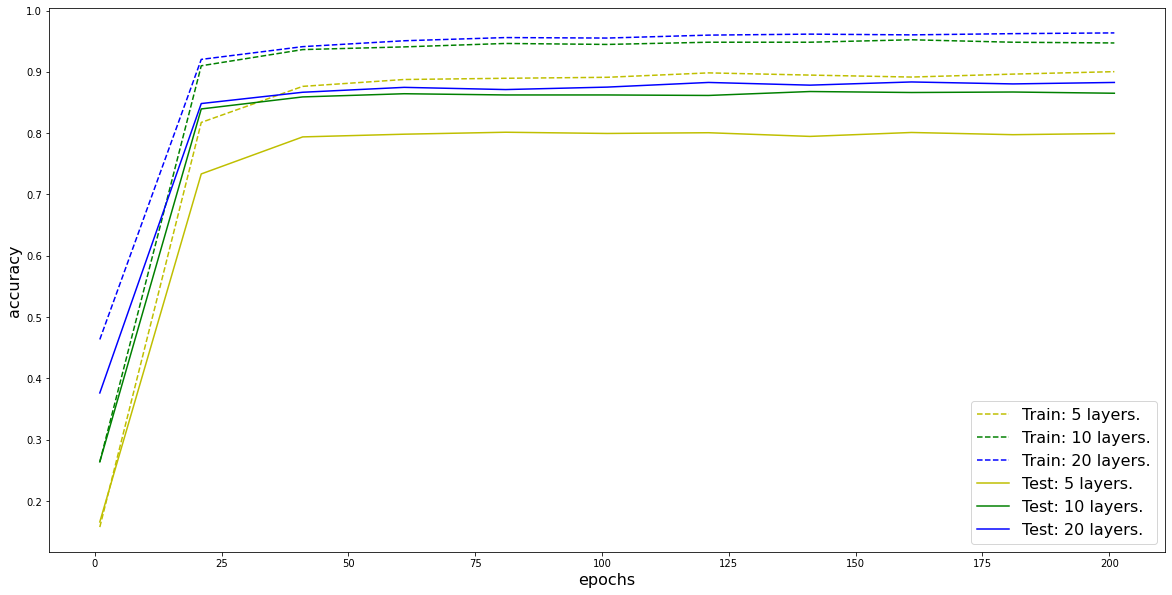

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
epochs_array = [i for i in range(1, 220, 20)]

for nn in nns:
    hidden_layers = nn.sizes[1]
    if nn.sizes[1] == 5:
        plt.plot(epochs_array, nn.acc_train_array, "--y", label = f"Train: {hidden_layers} layers.")
    if nn.sizes[1] == 10:
        plt.plot(epochs_array, nn.acc_train_array, "--g", label = f"Train: {hidden_layers} layers.")
    if nn.sizes[1] == 20:
        plt.plot(epochs_array, nn.acc_train_array, "--b", label = f"Train: {hidden_layers} layers.")

for nn in nns:
    hidden_layers = nn.sizes[1]
    if nn.sizes[1] == 5:
        plt.plot(epochs_array, nn.acc_test_array, "-y", label = f"Test: {hidden_layers} layers.")
    if nn.sizes[1] == 10:
        plt.plot(epochs_array, nn.acc_test_array, "-g", label = f"Test: {hidden_layers} layers.")
    if nn.sizes[1] == 20:
        plt.plot(epochs_array, nn.acc_test_array, "-b", label = f"Test: {hidden_layers} layers.")


ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("accuracy", fontsize=16)
plt.show()

Give your explanation below.

**[ANSWER]** In the plot we can clearly see the effect of adding hidden layers to the neural network, making possible the increase in both the training and testing accuracy. We also see that after certain point (20 epochs) the increase in the accuracy is slower and then plateaus. In general we can say that more layers will give us a more accurate network but it will also cost us more, computationally speaking. On the other hand, the addition of layers will not be significant in terms of the network's performance if we do not take care of having good training data (good in quality and quantity).

Finally, it is important to point out that (according to the Universal Approximation Theorem) neural networks with one hidden layer can approximate any continuous function for inputs within a specific range, therefore adding too much layers (depending on the case) could lead us to a neural network overfitting. Certainly more layers will increase the learning speed for a given neural network but it can also be the source of issues when training the network.

## [14 points] Problem 4 - Tensors and Autograd.
In this problem, we will demonstrate the benefits of PyTorch's Autograd mechanics by converting your implementation from Problem to utilize PyTorch Tensors. This problem is not meant to be difficult, rather it should be quite simple once you've done Problem 3.

Note that there are *better* ways to go about this which we will cover next. Here. we are keeping things as close to numpy as possible on purpose to show what's going on behind the scenes. Take a moment to look through our modifications to get an understanding of the differences. In the comments, we'll make notes of native torch functions that perform the same operations. 

Here, SGD is implemented manually to show you what's going on behind the scenes, but  usually you'd use [`torch.optim.SGD`](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD). For future reference, the `weight_decay` parameter implements L2 normilazion. 

--- 

Before we move forward, let's cover a couple of points on notation. 

Just as it's best practice to do `import numpy as np`, PyTorch has best practices for imports as well:

```python
import torch 
import torch.nn as nn
import torch.nn.functional as F
```
You'll find that many of the functions you've been learning in NumPy have direct translations in PyTorch. The documentation can be found [here](https://pytorch.org/docs/stable/index.html) and is very user friendly, but we'll cover a few notable differences. 

- The numpy parameter `axis` becomes `dim` in PyTorch.
- Tensors have [view](https://pytorch.org/docs/stable/tensor_view.html) operations, which avoid copying data unnecasarily. Use these instead of `reshape()`. 
- Using `torch.from_numpy()` also avoids copying data stored in `numpy` arrays.
- Numpy interprets `np.dot()` of 2D matrices as matrix multiplication. Pytorch does not have this behaviour, see instead [`torch.matmul()`](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)
- PyTorch uses trailing underscores such as `torch.add_()` to denote in-place operations. As an example, the following operations are equivilent:
```python
x = x + y
x = torch.add(x, y)
x.add_(y)
```
You're likely to see these operations when randomly initializing Tensors, or filling a tensor with zeros:
```python
torch.nn.init.uniform_(x)
x.zero_()
```

---
Now onto the problem, your tasks are as follows:

1. Modify `forward_prop` to work on PyTorch Tensors.
2. Modify `SGD_step` to work on PyTorch Tensors. This is easier than it sounds, since with PyTorch we don't have to worry about calculating gradients manually.

In [21]:
import torch


class TorchNetwork(Network):
    def __init__(self, sizes, keep_prob=-1):
        super().__init__(sizes)
        
        # Convert your weights and biases to Tensors.
        # The flag requires_grad=True tells PyTorch to track gradients for us. 
        self.biases = [torch.tensor(b, requires_grad=True) for b in self.biases]
        self.weights = [torch.tensor(w, requires_grad=True) for w in self.weights]
        

    def g(self, z):
        """ Activation function
            Could also use torch.sigmoid(z)
        """
        return sigmoid_torch(z) 

    def forward_prop(self, a):
        """ Memory aware forward propagation. 
            Now this is for both training and testing.
        """
        # TODO: Convert your forward_prop function from part a to work on Tensors. 
        
        for W,b in zip(self.weights, self.biases):
            z= torch.matmul(W, a) + b
            a = self.g(z)

        return a

    def cost(self, a, y):
        """ Cost function, same as F.mse_loss()
        """
        return ((a - y)**2).mean() 
            

    def SGD_step(self, x, y, eta, lam):
        """
            Performs a single step of SGD on weights and biases

        Args:
            x: single sample features.
            y: single sample target.
            eta: learning rate.
            lam: Regularization parameter.  
        """
        
        # Zero out the old gradients if they exist. 
        # Would be optim.zero_grad() if we were using an optimizer.
        for p in (*self.weights, *self.biases):
            if p.grad is not None:
                p.grad.detach_()
                p.grad.zero_()
            
        # TODO: 

        # (1) Call forward_prop to get a.
        a = self.forward_prop(x)
        # (2) Calculate loss using the cost function.
        loss = self.cost(a,y)
        # (3) Use loss.backward() to to perform backpropagation automatically.
        loss.backward()

        # Perform sgd update 
        # Would be optimizer.step()
        with torch.no_grad():
            # l2 regularization on weights only.
            for p in self.weights:
                p.grad.add_(p, alpha=lam)
            # sgd update. 
            for p in (*self.weights, *self.biases):
                p.add_(p.grad, alpha=-eta)
                

def sigmoid_torch(z, threshold=20):
    """ Same as sigmoid before, now with torch.clamp() instead of np.clip().
        We could also just use torch.sigmoid().
    """
    z = torch.clamp(z, -threshold, threshold)
    return 1.0 / (1.0 + torch.exp(-z))


**Part 1 [14 points]:** Implement `SGD_step` and `forward_prop`. Use the following test cases to verify if the code is working as expected.

In [22]:
from tests import tests
tests.run_test_suite('new prob 4', TorchNetwork)

TestBackPropWithoutRegularization (tests.tests.TestNetwork) ... ok
TestBackPropWithRegularization (tests.tests.TestNetwork) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.744s

OK
